In [1]:
import pandas as pa
import numpy as np
import nltk

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string
import enchant
import warnings
warnings.filterwarnings('ignore')

# Step-1 Load the data

In [2]:
df = pa.read_csv('data.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
LABELS = list(df.columns)  # getting all columns
CLASS_LABELS = LABELS[2:]  # selecting only classes
CLASS_LABELS

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

toxic            139
severe_toxic      15
obscene           68
threat             7
insult            69
identity_hate     14
dtype: int64


<AxesSubplot:>

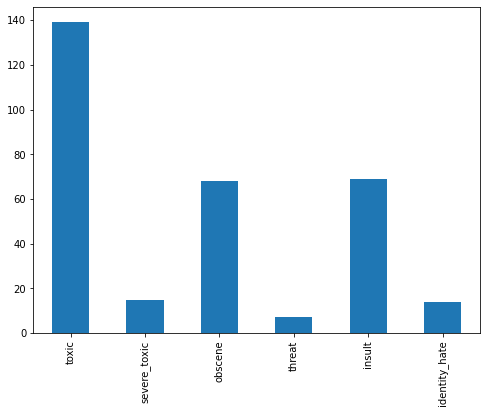

In [4]:
#the data is multilabeled i.e each comment contains more than one class.
#Below is the count of each class for the number of comments.
count = df[CLASS_LABELS].sum()
print(count)
count.plot.bar(figsize=(8, 6))

In [5]:
new_df = df.drop('id',axis=1)
new_df.head(11)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
new_df.tail()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1379,"""I'm back. I already created ID (occasionally...",0,0,0,0,0,0
1380,Name \n\nThe college has changed its name to s...,0,0,0,0,0,0
1381,"""\n\n Upcoming album, Screaming Bloody Murder ...",0,0,0,0,0,0
1382,Too many parentheses. \n\nIt sounds to persona...,0,0,0,0,0,0
1383,"Can you, or anyone, please tell me what's goin...",0,0,0,0,0,0


In [7]:
label_list = []
for i in range(0,1384):
    toxic = new_df['toxic'][i]
    severe_toxic = new_df['severe_toxic'][i]
    obscene = new_df['obscene'][i]
    threat = new_df['threat'][i]
    insult = new_df['insult'][i]
    identity_hate = new_df['identity_hate'][i]
    ans = 'none'
    if severe_toxic == 1:
        ans = 'severe_toxic'
    elif obscene == 1:
        ans = 'obscene'
    elif threat == 1:
        ans = 'threat'
    elif insult == 1:
        ans = 'insult'
    elif identity_hate == 1:
        ans = 'identity_hate'
    elif toxic == 1:
        ans = 'toxic'
    else:
        ans = 'none'
    label_list.append(ans)     
    
new_df['final_label'] = label_list

In [8]:
new_df['final_label'].unique()

array(['none', 'severe_toxic', 'toxic', 'obscene', 'threat', 'insult'],
      dtype=object)

In [9]:
# getting all comment_text in single list to perform preprocessing easily
comment_list = []
new_list = []
for w in new_df['comment_text']:
    comment_list.append(w)

import re
for w in comment_list:
    n = re.sub("[^A-Za-z]+"," ",w)
    new_list.append(n)

# Step-2 Pre-Processing

In [10]:
# PreProcessing steps
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
filtered_list=[]
for w in new_list:
    word=word_tokenize(w)
    for a in word:
        if a not in stop_words:
            if a not in string.punctuation:
                if a.startswith("n't"):
                    a=a.replace("n't",'not')
                if a not in filtered_list:
                    filtered_list.append(a) 

# Step-3 Feature Extraction

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
count = count_vec.fit(filtered_list)

# Step-4 Build and Train the Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# models
knn = KNeighborsClassifier(n_neighbors=1)
log_reg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()
naive = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(new_df['comment_text'],new_df['final_label'], test_size=0.20, random_state = 0)

In [13]:
q = count.transform(X_train)

In [14]:
X_test = count.transform(X_test)

# K-nearest Neighbour

In [15]:
knn.fit(q,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   1   0   0   1]
 [  2 242   5   0   5]
 [  0   4   3   0   1]
 [  0   2   0   0   0]
 [  1   8   1   1   0]]
              precision    recall  f1-score   support

      insult       0.00      0.00      0.00         2
        none       0.94      0.95      0.95       254
     obscene       0.33      0.38      0.35         8
severe_toxic       0.00      0.00      0.00         2
       toxic       0.00      0.00      0.00        11

    accuracy                           0.88       277
   macro avg       0.25      0.27      0.26       277
weighted avg       0.87      0.88      0.88       277



# Logistic Regression

In [16]:
log_reg.fit(q,y_train)
pred = log_reg.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   2   0   0   0]
 [  0 252   0   0   2]
 [  0   4   3   0   1]
 [  0   0   2   0   0]
 [  0  10   1   0   0]]
              precision    recall  f1-score   support

      insult       0.00      0.00      0.00         2
        none       0.94      0.99      0.97       254
     obscene       0.50      0.38      0.43         8
severe_toxic       0.00      0.00      0.00         2
       toxic       0.00      0.00      0.00        11

    accuracy                           0.92       277
   macro avg       0.29      0.27      0.28       277
weighted avg       0.88      0.92      0.90       277



# Random Forest Classifier

In [17]:
rfc.fit(q,y_train)
pred = rfc.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   2   0   0   0]
 [  0 254   0   0   0]
 [  0   6   2   0   0]
 [  0   2   0   0   0]
 [  0  11   0   0   0]]
              precision    recall  f1-score   support

      insult       0.00      0.00      0.00         2
        none       0.92      1.00      0.96       254
     obscene       1.00      0.25      0.40         8
severe_toxic       0.00      0.00      0.00         2
       toxic       0.00      0.00      0.00        11

    accuracy                           0.92       277
   macro avg       0.38      0.25      0.27       277
weighted avg       0.88      0.92      0.89       277



# Support Vector Machine

In [18]:
svc.fit(q,y_train)
pred = svc.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   2   0   0   0]
 [  0 254   0   0   0]
 [  0   8   0   0   0]
 [  0   2   0   0   0]
 [  0  11   0   0   0]]
              precision    recall  f1-score   support

      insult       0.00      0.00      0.00         2
        none       0.92      1.00      0.96       254
     obscene       0.00      0.00      0.00         8
severe_toxic       0.00      0.00      0.00         2
       toxic       0.00      0.00      0.00        11

    accuracy                           0.92       277
   macro avg       0.18      0.20      0.19       277
weighted avg       0.84      0.92      0.88       277



# Multinomial Naive Bayes 

In [19]:
naive.fit(q,y_train)
pred = naive.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   2   0   0   0]
 [  2 250   0   0   2]
 [  0   6   2   0   0]
 [  0   2   0   0   0]
 [  0  11   0   0   0]]
              precision    recall  f1-score   support

      insult       0.00      0.00      0.00         2
        none       0.92      0.98      0.95       254
     obscene       1.00      0.25      0.40         8
severe_toxic       0.00      0.00      0.00         2
       toxic       0.00      0.00      0.00        11

    accuracy                           0.91       277
   macro avg       0.38      0.25      0.27       277
weighted avg       0.87      0.91      0.88       277

